In [ ]:
# Name: P Praneeth Reddy
# Reg: BL.EN.U4CSE21142

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("train_agriculture.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [ ]:
# # Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
# your data deals with multiple classes, you can take any two classes. Steps below (refer below
# diagram for understanding):

In [ ]:
unique_classes = df['Crop_Damage'].unique()
print("Unique Classes are:")
print(unique_classes)

Unique Classes are:
[0 1 2]


In [ ]:
# A1
# Calculate the mean for each class (also called as class centroid)

In [ ]:
c1 = np.mean(df['Crop_Damage'] == 0)
c2 = np.mean(df['Crop_Damage'] == 1)
c3 = np.mean(df['Crop_Damage'] == 2)
print(c1)
print(c2)
print(c3)

0.8354678250692116
0.13850187940309258
0.026030295527695875


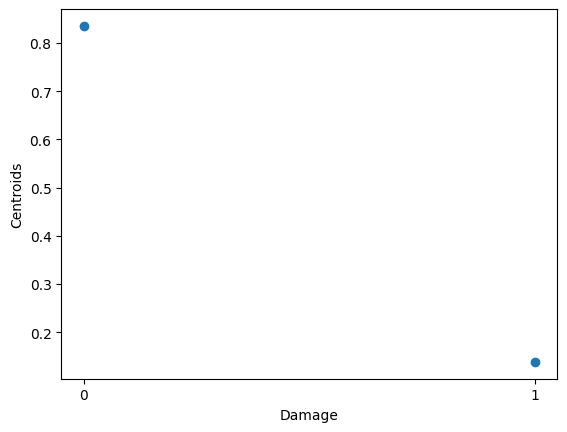

In [ ]:
#plotting
centroids = [c1, c2]
Damaged=[0,1]
plt.xticks([0, 1])
plt.scatter(Damaged, centroids)
plt.xlabel('Damage')
plt.ylabel('Centroids')
plt.show()

In [ ]:
# Calculate spread (standard deviation) for each class
sd1 = np.std(df['Crop_Damage'] == 0)
sd2 = np.std(df['Crop_Damage'] == 1)
print(sd1)
print(sd2)

0.37075778932253445
0.34542598165873944


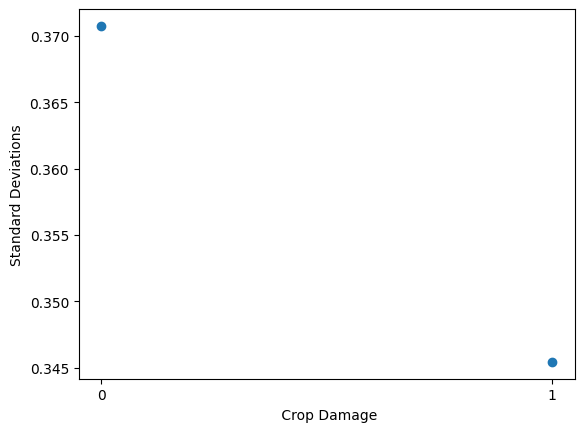

In [ ]:
# plotting
standard_deviations = [sd1, sd2]
Damage = [0, 1]
plt.xticks([0, 1])
plt.scatter(Damage, standard_deviations)
plt.xlabel(' Crop Damage')
plt.ylabel('Standard Deviations')
plt.show()

In [ ]:
# Calculate the distance between mean vectors between classes
distance_between_centroids = np.linalg.norm(c1 - c2)
print("the distance between mean vectors between classes is : ",distance_between_centroids)

the distance between mean vectors between classes is :  0.696965945666119


The Mean is: 1399.01
The Variance is: 720875.72


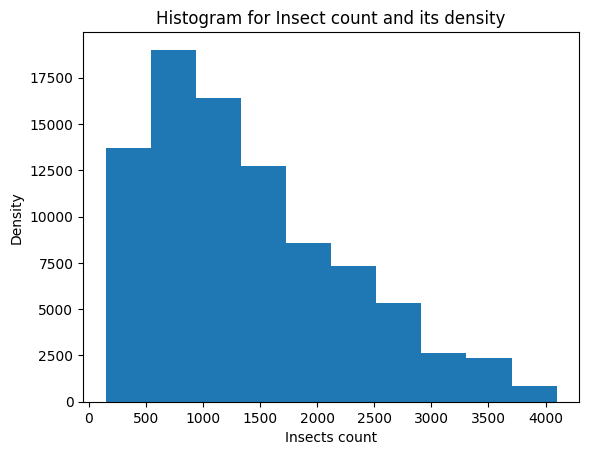

In [ ]:
# plotting
plt.hist(df['Estimated_Insects_Count'])
plt.xlabel('Insects count')
plt.ylabel('Density')
plt.title('Histogram for Insect count and its density')
mean = np.mean(df['Estimated_Insects_Count'])
variance = np.var(df['Estimated_Insects_Count'])
print(f"The Mean is: {mean:.2f}")
print(f"The Variance is: {variance:.2f}")
plt.show()

In [ ]:
# A2
values = np.arange(1, 11)
distances = []
for r in values:
    distance = np.power(np.sum(np.power(np.abs(df['Estimated_Insects_Count'] - df['Number_Weeks_Used']), r)), 1/r)
    distances.append(distance)

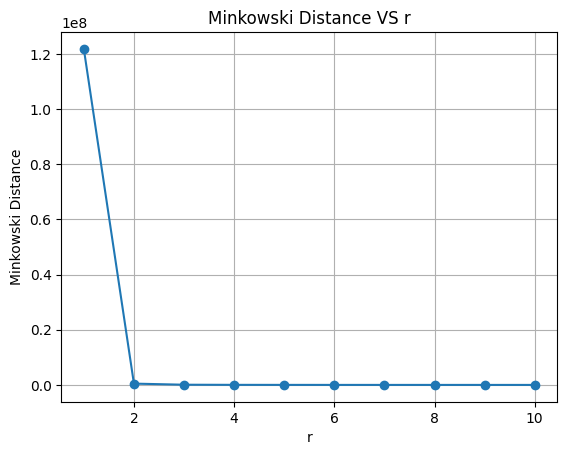

In [ ]:
# plotting
plt.plot(values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance VS r')
plt.grid(True)
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
X = df['Estimated_Insects_Count']
X_array = X.to_numpy()
X_reshaped = X_array.reshape(-1, 1)
X = X_reshaped
y = df['Crop_Damage'] == 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 62200
Test set size: 26658


In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print("printing x-train")
print(X_train)
print("printing y-train")
print(y_train_encoded)
from sklearn.neighbors import KNeighborsClassifier as knn
neigh = knn(n_neighbors=3)
neigh.fit(X_train, y_train_encoded)

printing x-train
[[ 850]
 [1296]
 [1296]
 ...
 [2688]
 [ 851]
 [ 851]]
printing y-train
[1 1 1 ... 1 1 1]


KNeighborsClassifier(n_neighbors=3)

In [156]:
neigh.score(X_test, y_test)

0.8243304073823993

In [157]:
neigh.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [158]:
neigh = KNeighborsClassifier(n_neighbors=1)
print("Fit", neigh.fit(X, y))
print("Score: ", neigh.score(X_test, y_test))
print("Predict: ", neigh.predict(X_test))

Fit KNeighborsClassifier(n_neighbors=1)
Score:  0.6046590141796083
Predict:  [False False  True ...  True False  True]


for k= 1
Accuracy: 0.60
for k= 2
Accuracy: 0.48
for k= 3
Accuracy: 0.63
for k= 4
Accuracy: 0.54
for k= 5
Accuracy: 0.72
for k= 6
Accuracy: 0.70
for k= 7
Accuracy: 0.74
for k= 8
Accuracy: 0.71
for k= 9
Accuracy: 0.75
for k= 10
Accuracy: 0.70
for k= 11
Accuracy: 0.74


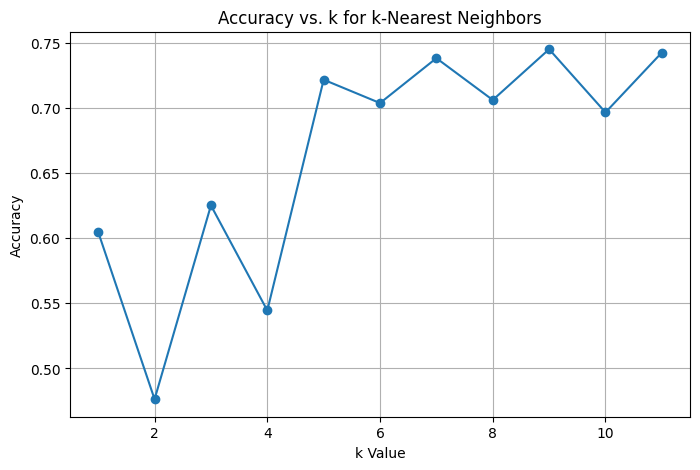

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy = []
for k in range(1, 12):
    print("for k=", k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print(f"Accuracy: {acc:.2f}")
k = range(1, 12)
plt.figure(figsize=(8, 5))
plt.plot(k, accuracy, marker='o', linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-Nearest Neighbors')
plt.grid(True)
plt.show()

In [160]:
from sklearn.metrics import confusion_matrix
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Training Data):\n", confusion_matrix_train)
print("\nConfusion Matrix (Test Data):\n", confusion_matrix_test)

Confusion Matrix (Training Data):
 [[ 2066  8152]
 [ 7963 44019]]

Confusion Matrix (Test Data):
 [[  886  3516]
 [ 3349 18907]]


In [161]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("Precision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_score_train)
print("\nPrecision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_score_test)


Precision (Training Data): 0.8437446090740066
Recall (Training Data): 0.8468123581239659
F1-Score (Training Data): 0.8452757001718625

Precision (Test Data): 0.8431967176559783
Recall (Test Data): 0.8495237239396118
F1-Score (Test Data): 0.8463483963383246


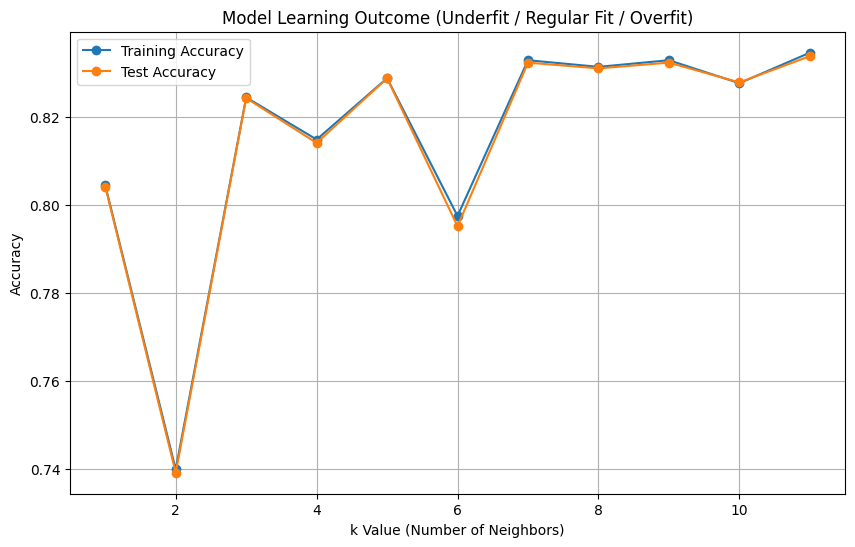

In [163]:
train_accuracies = []
test_accuracies = []
k_values = range(1, 12)
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('k Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Model Learning Outcome (Underfit / Regular Fit / Overfit)')
plt.legend()
plt.grid(True)
plt.show()